In [2]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

In [3]:
data = pd.read_csv('C:/Users/19054/Desktop/mlp/GOOG1.csv')
print(data.info())
data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 7 columns):
Date         1763 non-null object
Open         1763 non-null float64
High         1763 non-null float64
Low          1763 non-null float64
Close        1763 non-null float64
Adj Close    1763 non-null float64
Volume       1763 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 96.5+ KB
None


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-29,507.647217,516.533875,504.857666,516.185181,516.185181,3222000
1,2013-10-30,516.778015,516.817810,511.084320,513.286072,513.286072,2658000
2,2013-10-31,512.543884,518.815369,510.073120,513.365784,513.365784,3292200
3,2013-11-01,513.968506,516.065674,510.636017,511.602386,511.602386,2576100
4,2013-11-04,513.824036,514.257446,509.106750,511.139130,511.139130,2286000
...,...,...,...,...,...,...,...
1758,2020-10-22,1593.050049,1621.989990,1585.000000,1615.329956,1615.329956,1433600
1759,2020-10-23,1626.069946,1642.359985,1620.510010,1641.000000,1641.000000,1375800
1760,2020-10-26,1625.010010,1638.239990,1576.500000,1590.449951,1590.449951,1853300
1761,2020-10-27,1595.670044,1606.844971,1582.780029,1604.260010,1604.260010,1229000


In [4]:
# Select features (columns) to be involved intro training and predictions
columns = list(data)[1:6]

# Extract dates (will be used in visualization)
datelist_train = list(data['Date'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print('Training set shape == {}'.format(data.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(columns))

Training set shape == (1763, 7)
All timestamps == 1763
Featured selected: ['Open', 'High', 'Low', 'Close', 'Adj Close']


In [5]:
import pandas as pd
data = data[columns].astype(str)
for i in columns:
    for j in range(0, len(data)):
        data[i][j] = data[i][j].replace(',', '')

data = data.astype(float)

# Using multiple features (predictors)
training_set = data.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (1763, 5).


array([[ 507.647217,  516.533875,  504.857666,  516.185181,  516.185181],
       [ 516.778015,  516.81781 ,  511.08432 ,  513.286072,  513.286072],
       [ 512.543884,  518.815369,  510.07312 ,  513.365784,  513.365784],
       ...,
       [1625.01001 , 1638.23999 , 1576.5     , 1590.449951, 1590.449951],
       [1595.670044, 1606.844971, 1582.780029, 1604.26001 , 1604.26001 ],
       [1559.73999 , 1561.349976, 1514.619995, 1516.619995, 1516.619995]])

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-1.33524898],
       [-1.30521508],
       [-1.31914239],
       ...,
       [ 2.34008812],
       [ 2.24358028],
       [ 2.1253957 ]])

In [10]:
# Creating a data structure with 90 timestamps and 1 output
from sklearn.model_selection import train_test_split
X = []
y = []

n_future = 60   # Number of days we want top predict into the future
n_past = 90     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X.append(training_set_scaled[i - n_past:i, 0:data.shape[1] - 1])
    y.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X, y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print("\nX_train:\n")
print(X_train)
print(X_train.shape)
print("\n")

print("\nX_test:\n")
print(X_test)
print(X_test.shape)
print("\n")

print("\ny_train:\n")
print(y_train)
print(y_train.shape)
print("\n")

print("\ny_test:\n")
print(y_test)
print(y_test.shape)
print("\n")



X_train:

[[[-1.20294435 -1.21214717 -1.23020619 -1.23599376]
  [-1.23399531 -1.24151968 -1.24001461 -1.23415565]
  [-1.23366627 -1.22681718 -1.23017291 -1.22470247]
  ...
  [-1.01308607 -0.99875139 -1.01521961 -0.98325298]
  [-0.97555529 -0.98132274 -1.00487605 -1.00980727]
  [-1.03147333 -1.03403085 -1.03004863 -1.02802426]]

 [[-0.27934297 -0.28826525 -0.25405583 -0.27288735]
  [-0.27454052 -0.29082918 -0.27320715 -0.27101639]
  [-0.28240199 -0.3020589  -0.26881829 -0.27984591]
  ...
  [ 0.09497909  0.08510426  0.07248008  0.04408899]
  [ 0.05070509  0.06712391  0.03640526  0.08728459]
  [ 0.05373119  0.02983242  0.01851741  0.01277526]]

 [[-1.27597721 -1.26770862 -1.27211416 -1.26043026]
  [-1.25416333 -1.26424535 -1.26637781 -1.27162518]
  [-1.28348914 -1.28075228 -1.28060249 -1.27201804]
  ...
  [-1.1024827  -1.09593802 -1.08861933 -1.09470015]
  [-1.0894273  -1.09415795 -1.07956724 -1.08127926]
  [-1.08083285 -1.07726257 -1.06514369 -1.06936433]]

 ...

 [[-0.26342268 -0.28686

In [30]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

# Initializing the Neural Network based on LSTM
model = Sequential()
model.add(LSTM(units=64, return_sequences=True,  input_shape=(90, data.shape[1]-1)))
model.add(LSTM(units=10, activation='relu', return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error', metrics = ['mean_absolute_error'])

In [31]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True,
                      save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle= True, epochs=30,  callbacks=[es, rlr, mcp, tb],
                    validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/30
4/4 [==============================] - ETA: 0s - loss: 0.8320 - mean_absolute_error: 0.7360
Epoch 00001: val_loss improved from inf to 0.42026, saving model to weights.h5
4/4 [==============================] - 2s 453ms/step - loss: 0.8320 - mean_absolute_error: 0.7360 - val_loss: 0.4203 - val_mean_absolute_error: 0.5255 - lr: 0.0100
Epoch 2/30
4/4 [==============================] - ETA: 0s - loss: 0.6393 - mean_absolute_error: 0.6462
Epoch 00002: val_loss did not improve from 0.42026
4/4 [==============================] - 0s 108ms/step - loss: 0.6393 - mean_absolute_error: 0.6462 - val_loss: 0.4265 - val_mean_absolute_error: 0.5324 - lr: 0.0100
Epoch 3/30
4/4 [==============================] - ETA: 0s - loss: 0.6279 - mean_absolute_error: 0.6391
Epoch 00003: val_loss did not improve from 0.42026
4/4 [==============================] - 0s 116ms/step - loss: 0.6279 - mean_absolute_error: 0.6391 - val_loss: 0.4253 - val_mean_absolute_error: 0.5326 - lr: 0.0100
Epoch 4/30
4/4 [==

In [45]:
y_pred = model.predict(X_test)
y_pred

array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [9.7482866e-01],
       [9.1158962e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [5.4516333e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [8.8389009e-02],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [9.7111571e-01],
       [0.0000000e+00],
       [2.6417314e-32],
       [0.0000000e+00],
       [7.7045190e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [4.9609390e-01],
       [7.3389828e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.000000

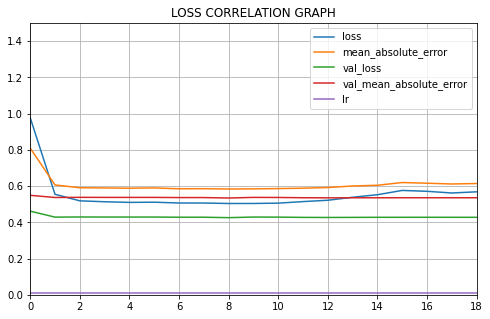

In [19]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.title('LOSS CORRELATION GRAPH')
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 90, 64)            17664     
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                3000      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 20,675
Trainable params: 20,675
Non-trainable params: 0
_________________________________________________________________


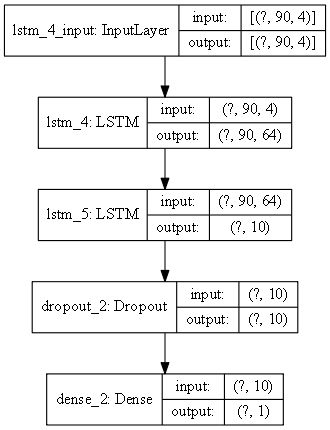

In [20]:
import tensorflow as tf
model.summary()
tf.keras.utils.plot_model(
    model, to_file='fd.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=80
)

In [47]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred, multioutput='variance_weighted'))
from sklearn.metrics import mean_poisson_deviance
print(mean_poisson_deviance(y_test,y_pred))
from sklearn.metrics import mean_gamma_deviance
#print(mean_gamma_deviance(y_test,y_pred))
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_test,y_pred, multioutput='uniform_average'))


0.31706411311297733


ValueError: Mean Tweedie deviance error with power=1 can only be used on non-negative y and strictly positive y_pred.